In [3]:
!pip install influxdb_client influxdb

In [4]:
pip install pyspark 

Note: you may need to restart the kernel to use updated packages.


In [5]:
from datetime import datetime
from influxdb import DataFrameClient
from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS

In [6]:
from pyspark.sql import SparkSession
import pandas as pd
spark = SparkSession.builder.appName("Test").getOrCreate()
df = pd.read_excel('SWaT_dataset_Jul 19 v2.xlsx', parse_dates = ['GMT +0'])

df.head()
#sdf = spark.createDataFrame(df) sdf.show()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,2019-07-20 08:39:59.004013+00:00,4.323736,492.896881,2,2,2,1,131.408615,9.313829,257.933868,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
1,2019-07-20 08:39:58.005004800+00:00,4.323736,492.465100,2,2,2,1,131.408615,9.316713,257.703156,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
2,2019-07-20 08:39:57.005004800+00:00,4.303558,492.308100,2,2,2,1,131.408615,9.317354,257.703156,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20 08:39:56.005004800+00:00,4.253915,491.405273,2,2,2,1,131.408615,9.317354,257.703156,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20 08:39:55.001007+00:00,4.200429,491.169769,2,2,2,1,131.408615,9.319918,257.703156,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


In [7]:
import numpy as np

In [8]:
df['LS 201']=np.where(df['LS 201'] == 'Active', 1, 0)
df['LS 202']=np.where(df['LS 202'] == 'Active', 1, 0)
df['LSL 203']=np.where(df['LSL 203'] == 'Inactive', 0, 1)
df['LSLL 203']=np.where(df['LSLL 203'] == 'Active', 1, 0)
df['LS 401']=np.where(df['LS 401'] == 'Active', 1, 0)
df['LSH 601']=np.where(df['LSH 601'] == 'Active', 1, 0)
df['LSH 602']=np.where(df['LSH 602'] == 'Active', 1, 0)
df['LSH 603']=np.where(df['LSH 603'] == 'Active', 1, 0)
df['LSL 601']=np.where(df['LSL 601'] == 'Active', 1, 0)
df['LSL 602']=np.where(df['LSL 602'] == 'Active', 1, 0)
df['LSL 603']=np.where(df['LSL 603'] == 'Active', 1, 0)

In [9]:
df

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,2019-07-20 08:39:59.004013+00:00,4.323736,492.896881,2,2,2,1,131.408615,9.313829,257.933868,...,1,1,0,0,0,1,2,1,1,1
1,2019-07-20 08:39:58.005004800+00:00,4.323736,492.465100,2,2,2,1,131.408615,9.316713,257.703156,...,1,1,0,0,0,1,2,1,1,1
2,2019-07-20 08:39:57.005004800+00:00,4.303558,492.308100,2,2,2,1,131.408615,9.317354,257.703156,...,1,1,0,0,0,1,2,1,1,1
3,2019-07-20 08:39:56.005004800+00:00,4.253915,491.405273,2,2,2,1,131.408615,9.317354,257.703156,...,1,1,0,0,0,1,2,1,1,1
4,2019-07-20 08:39:55.001007+00:00,4.200429,491.169769,2,2,2,1,131.408615,9.319918,257.703156,...,1,1,0,0,0,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14991,2019-07-20 04:30:04+00:00,0.000000,727.706900,1,3,2,1,142.527557,9.289157,198.897720,...,1,1,0,0,0,1,2,1,1,1
14992,2019-07-20 04:30:03.004013+00:00,0.000000,728.688200,1,3,2,1,142.527557,9.289157,198.667000,...,1,1,0,0,0,1,2,1,1,1
14993,2019-07-20 04:30:02.004013+00:00,0.000000,729.120000,1,3,2,1,142.527557,9.293002,198.436300,...,1,1,0,0,0,1,2,1,1,1
14994,2019-07-20 04:30:01+00:00,0.000000,729.434000,1,3,2,1,142.527557,9.293002,198.385025,...,1,1,0,0,0,1,2,1,1,1


Sometimes datasets can be too big, and it is impossible for us to process every single data point, so we have to apply sampling methods. We implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. We  experiment with sampling directly all the data and conducting stratified sampling and observe the results in the data distribution.
We select LIT 101 sensor column as an example.
reservoir sampling with reservoir size M=50 and plot the histogram of LIT 101 feature

504.5157
821.1677
626.5918
738.6584
766.6456
820.5004
596.406433
595.1111
667.6109
526.2617
597.9765
823.562134
546.869446
796.9095
498.392273
821.442444
819.8331
647.003235
795.1039
821.207
822.5808
551.305
823.562134
528.9309
514.525146
820.304138
821.2462
673.7343
820.029358
821.2462
620.8216
821.442444
729.5125
659.6426
820.107849
614.5412
748.0398
821.1677
819.8331
587.496033
497.528717
720.366638
821.0107
823.5229
820.618164
820.225647
820.107849
520.334534
550.9517
819.5976


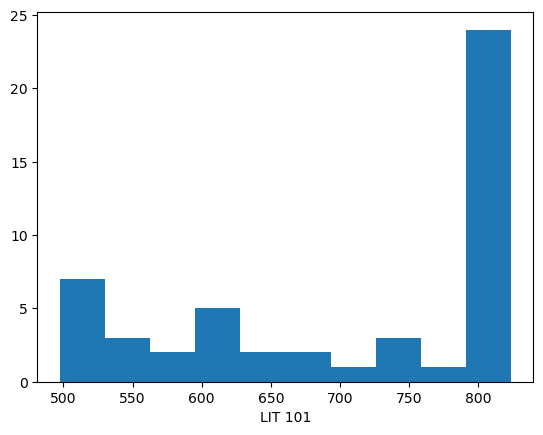

In [15]:
import random as rand
import matplotlib.pyplot as plt
def reservoir_sampling(stream,M):
    ##find the size of the stream
    stream_size =0
    for x in stream:
       stream_size+=1
    ##create a reservoir array with size M
    reservoir = [0] * M
    ##add data until reservoir is full
    for x in range (0, M): 
        reservoir[x] = stream[x]
    ##load data, if it is selected by chance, replace reservoir position, else do nothing
    for y in range (M, stream_size):
        j = rand.randint(0,y) 
        if j < M:
            reservoir[j] = stream[y]
    return reservoir

reservoir = reservoir_sampling(df['LIT 101'],50)

for x in range(0,50):
    print(reservoir[x])

plt.hist(reservoir[0:50]) #data 0-50, redcircle
plt.xlabel("LIT 101") # set label name for x

plt.show() #output the diagram
